In [132]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np



data = pd.read_csv("steam-games.csv")



data




,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,...,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count
0,730,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,NaN,NaN,Free,...,True,False,True,1,Very Positive,87.0,8062218.0,Mostly Positive,79.0,57466.0
1,570,Dota 2,"9 Jul, 2013","Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,NaN,NaN,Free,...,True,True,True,0,Very Positive,81.0,2243112.0,Mostly Positive,72.0,23395.0
2,2215430,Ghost of Tsushima DIRECTOR'S CUT,"16 May, 2024","Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,NaN,NaN,"₹3,999.00",...,True,False,False,0,Very Positive,89.0,12294.0,NaN,NaN,NaN
3,1245620,ELDEN RING,"24 Feb, 2022","Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,NaN,NaN,"₹3,599.00",...,True,False,False,6,Very Positive,93.0,605191.0,Very Positive,94.0,7837.0
4,1085660,Destiny 2,"1 Oct, 2019","Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,NaN,NaN,Free,...,True,False,False,0,Very Positive,80.0,594713.0,Mostly Positive,73.0,4845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42492,477910,Wanderer of Teandria,"26 Sep, 2017","Action, Adventure, Indie","Single-player, Steam Achievements, Steam Tradi...",Silentplaygames,Silentplaygames,₹250.00,-50%,₹125.00,...,True,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN
42493,1501390,KING PONG,"18 Feb, 2021","Action, Sports, Early Access","Single-player, Online PvP, Steam Achievements,...",Iconik,Iconik,₹529.00,-50%,₹264.00,...,True,False,False,1,NaN,NaN,NaN,NaN,NaN,NaN
42494,2683250,Falnarion Tactics III,"25 Dec, 2023",Strategy,"Single-player, Steam Achievements, Steam Cloud...",Team Syukino,Team Syukino,NaN,NaN,₹610.00,...,True,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN
42495,1508840,Great Exploration VR: New Colony beyond Viking...,"12 Jan, 2021","Action, Casual","Single-player, Tracked Controller Support, VR ...",William at Oxford,William at Oxford,₹199.00,-51%,₹97.00,...,True,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
data.head()

,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,...,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count
0,730,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,NaN,NaN,Free,...,True,False,True,1,Very Positive,87.0,8062218.0,Mostly Positive,79.0,57466.0
1,570,Dota 2,"9 Jul, 2013","Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,NaN,NaN,Free,...,True,True,True,0,Very Positive,81.0,2243112.0,Mostly Positive,72.0,23395.0
2,2215430,Ghost of Tsushima DIRECTOR'S CUT,"16 May, 2024","Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,NaN,NaN,"₹3,999.00",...,True,False,False,0,Very Positive,89.0,12294.0,NaN,NaN,NaN
3,1245620,ELDEN RING,"24 Feb, 2022","Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,NaN,NaN,"₹3,599.00",...,True,False,False,6,Very Positive,93.0,605191.0,Very Positive,94.0,7837.0
4,1085660,Destiny 2,"1 Oct, 2019","Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,NaN,NaN,Free,...,True,False,False,0,Very Positive,80.0,594713.0,Mostly Positive,73.0,4845.0


# **Предобработка данных**

In [134]:
data['discounted_price'].fillna(data['original_price'], inplace=True)
data['original_price'].fillna(data['discounted_price'], inplace=True)
data['discount_percentage'].fillna('0', inplace=True)




In [135]:
# Замена NaN значений на значения по умолчанию
data['overall_review'].fillna('No reviews', inplace=True)
data['overall_review_%'].fillna(0, inplace=True)
data['overall_review_count'].fillna(0, inplace=True)
data['recent_review'].fillna('No reviews', inplace=True)
data['recent_review_%'].fillna(0, inplace=True)
data['recent_review_count'].fillna(0, inplace=True)

data["original_price"] = data["original_price"].replace("Free",0)
data["discounted_price"] = data["discounted_price"].replace("Free",0)
data['original_price'] = data['original_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data['discounted_price'] = data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data["original_price"].fillna(0,inplace=True)
data["discounted_price"].fillna(0,inplace=True)
data["win_support"] = data["win_support"].replace(True,1).replace(False,0)
data["mac_support"] = data["mac_support"].replace(True,1).replace(False,0)
data["linux_support"] = data["linux_support"].replace(True,1).replace(False,0)
data

,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,...,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count
0,730,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,0.0,0,0.0,...,1,0,1,1,Very Positive,87.0,8062218.0,Mostly Positive,79.0,57466.0
1,570,Dota 2,"9 Jul, 2013","Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,0.0,0,0.0,...,1,1,1,0,Very Positive,81.0,2243112.0,Mostly Positive,72.0,23395.0
2,2215430,Ghost of Tsushima DIRECTOR'S CUT,"16 May, 2024","Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,3999.0,0,3999.0,...,1,0,0,0,Very Positive,89.0,12294.0,No reviews,0.0,0.0
3,1245620,ELDEN RING,"24 Feb, 2022","Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,3599.0,0,3599.0,...,1,0,0,6,Very Positive,93.0,605191.0,Very Positive,94.0,7837.0
4,1085660,Destiny 2,"1 Oct, 2019","Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,0.0,0,0.0,...,1,0,0,0,Very Positive,80.0,594713.0,Mostly Positive,73.0,4845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42492,477910,Wanderer of Teandria,"26 Sep, 2017","Action, Adventure, Indie","Single-player, Steam Achievements, Steam Tradi...",Silentplaygames,Silentplaygames,250.0,-50%,125.0,...,1,0,0,0,No reviews,0.0,0.0,No reviews,0.0,0.0
42493,1501390,KING PONG,"18 Feb, 2021","Action, Sports, Early Access","Single-player, Online PvP, Steam Achievements,...",Iconik,Iconik,529.0,-50%,264.0,...,1,0,0,1,No reviews,0.0,0.0,No reviews,0.0,0.0
42494,2683250,Falnarion Tactics III,"25 Dec, 2023",Strategy,"Single-player, Steam Achievements, Steam Cloud...",Team Syukino,Team Syukino,610.0,0,610.0,...,1,0,0,0,No reviews,0.0,0.0,No reviews,0.0,0.0
42495,1508840,Great Exploration VR: New Colony beyond Viking...,"12 Jan, 2021","Action, Casual","Single-player, Tracked Controller Support, VR ...",William at Oxford,William at Oxford,199.0,-51%,97.0,...,1,0,0,0,No reviews,0.0,0.0,No reviews,0.0,0.0


# **Кол-во игр поддерживающих различные ОС:**

In [136]:
linux =  len(data[data["linux_support"]==1])
win =  len(data[data["win_support"]==1])
mac = len(data[data["mac_support"]==1])



print(f"linux: {linux}, win: {win}, mac: {mac}")

linux: 7273, win: 42494, mac: 10659


# **Определяем самую популярную игру по количеству обзоров и оценке.**

In [137]:
top_10  = []


max_review_game = data.loc[data["overall_review_count"].idxmax()]
max_review_game





app_id                                                                730
title                                                    Counter-Strike 2
release_date                                                 21 Aug, 2012
genres                                               Action, Free to Play
categories              Cross-Platform Multiplayer, Steam Trading Card...
developer                                                           Valve
publisher                                                           Valve
original_price                                                        0.0
discount_percentage                                                     0
discounted_price                                                      0.0
dlc_available                                                           1
age_rating                                                              0
content_descriptor                                                    NaN
about_description       For over two d

Рассчитываем средние и медианные цены

In [138]:
median_original_price = data["original_price"].median()
median_original_price

299.0

# **Сводная статистика**

In [139]:
overall_review = data["overall_review_%"].median()
overall_review_count = data["overall_review_count"].median()




print(f"{overall_review}, {overall_review_count}")

80.0, 51.0


# **Популярность жанров**

In [140]:
from collections import Counter

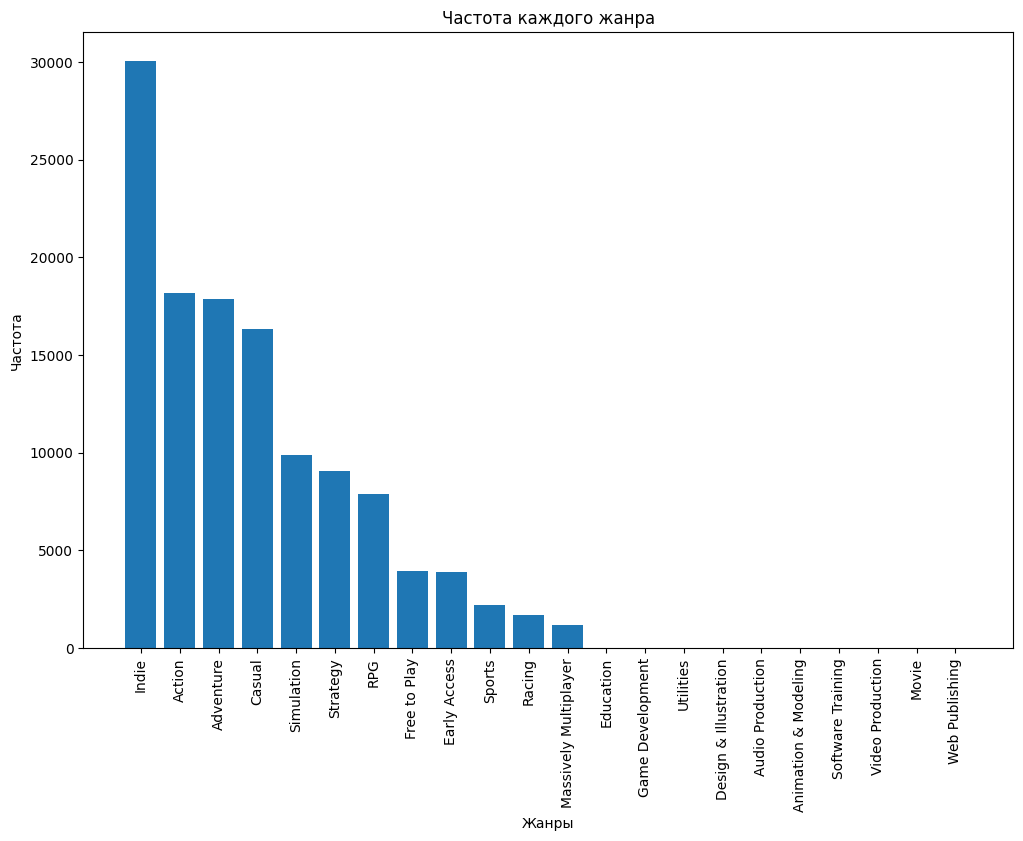

In [141]:
steam_games_df =data

genres_series = steam_games_df['genres'].dropna().str.split(',')
all_genres = [genre.strip() for sublist in genres_series for genre in sublist]
genre_counts = Counter(all_genres)


genre_counts_df = pd.DataFrame.from_dict(genre_counts, orient='index').reset_index()
genre_counts_df.columns = ['Genre', 'Count']
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)


plt.figure(figsize=(12, 8))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'])
plt.xlabel('Жанры')
plt.ylabel('Частота')
plt.title('Частота каждого жанра')
plt.xticks(rotation=90)
plt.show()

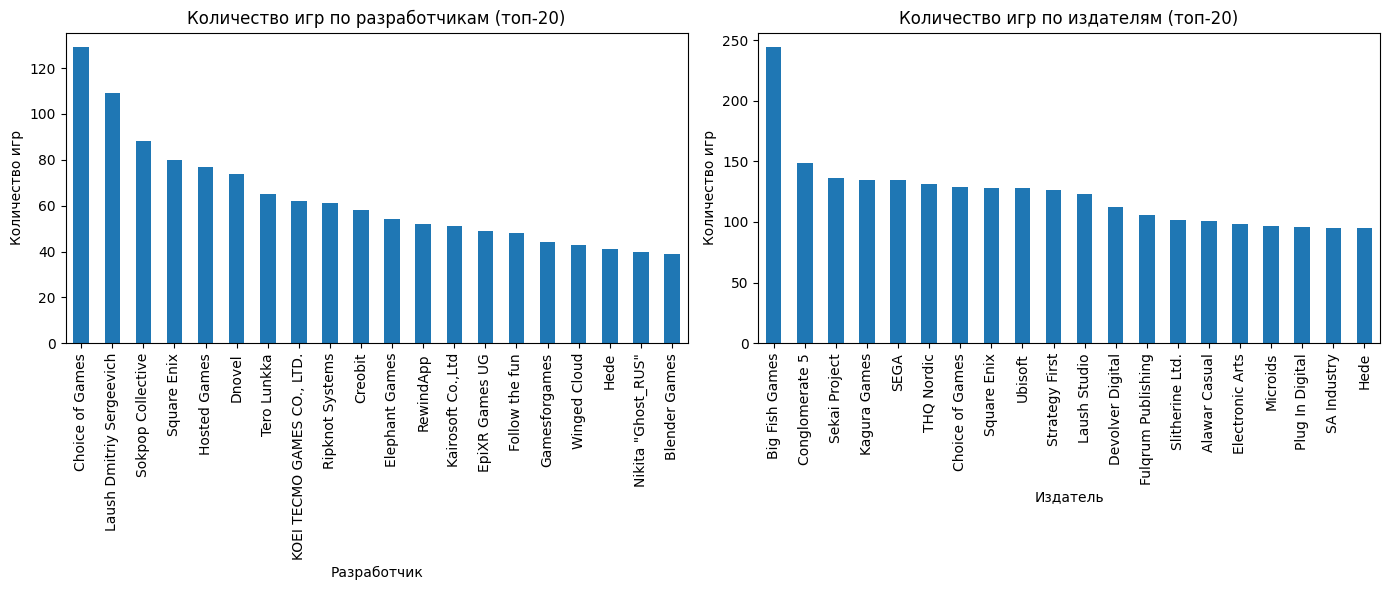

In [146]:

developer_counts = steam_games_df['developer'].value_counts().head(20)

publisher_counts = steam_games_df['publisher'].value_counts().head(20)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
developer_counts.plot(kind='bar')
plt.title('Количество игр по разработчикам (топ-20)')
plt.xlabel('Разработчик')
plt.ylabel('Количество игр')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
publisher_counts.plot(kind='bar')
plt.title('Количество игр по издателям (топ-20)')
plt.xlabel('Издатель')
plt.ylabel('Количество игр')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

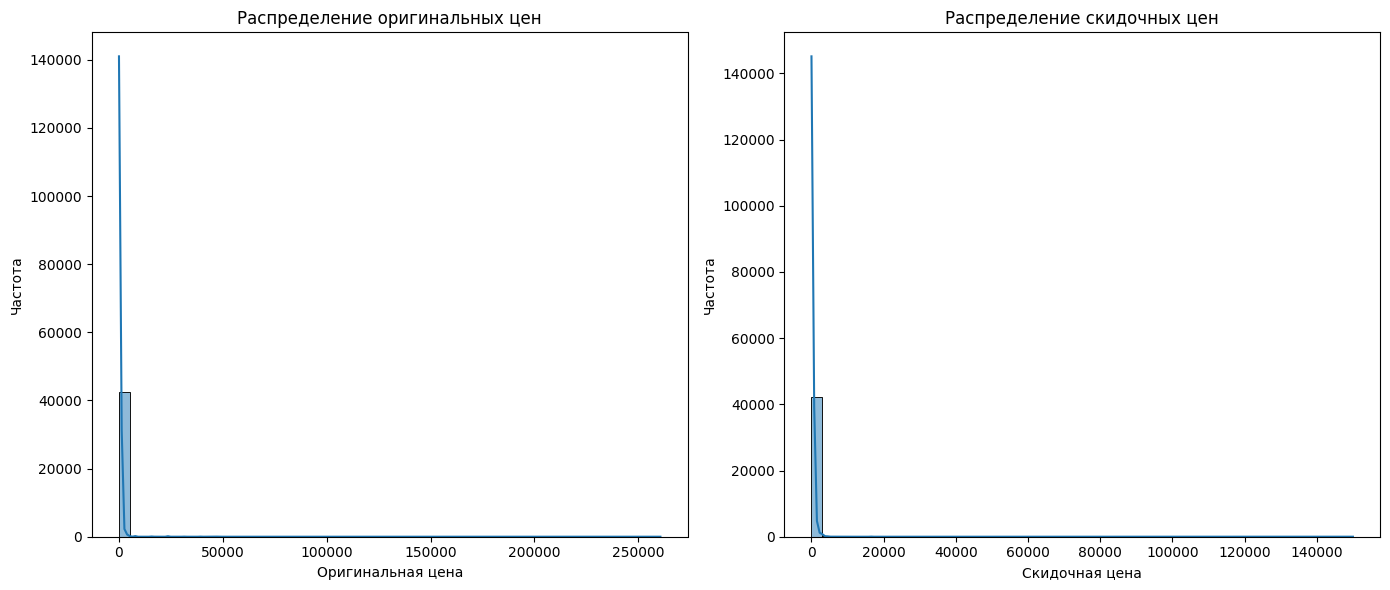

In [142]:
# Построение гистограмм
plt.figure(figsize=(14, 6))

# Гистограмма для оригинальных цен
plt.subplot(1, 2, 1)
sns.histplot(data['original_price'], bins=50, kde=True)
plt.title('Распределение оригинальных цен')
plt.xlabel('Оригинальная цена')
plt.ylabel('Частота')

# Гистограмма для скидочных цен
plt.subplot(1, 2, 2)
sns.histplot(data['discounted_price'], bins=50, kde=True)
plt.title('Распределение скидочных цен')
plt.xlabel('Скидочная цена')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

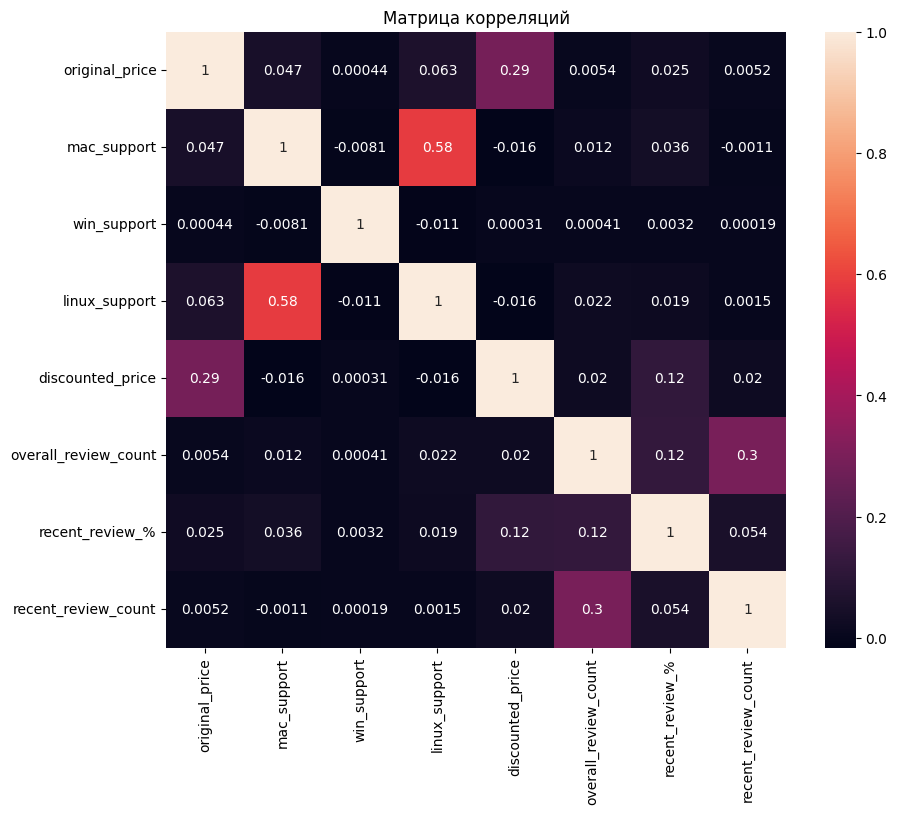

In [143]:
datacorr = data[["original_price","mac_support","win_support","linux_support",	"discounted_price","overall_review_count","recent_review_%",	"recent_review_count"]]
corr_mat = datacorr.corr()


plt.figure(figsize=(10,8))

sns.heatmap(corr_mat,annot=True)
plt.title("Матрица корреляций")
plt.show()
